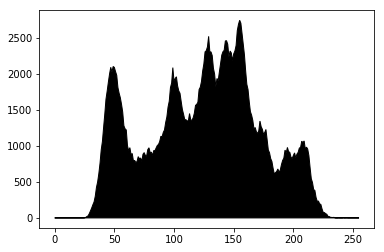

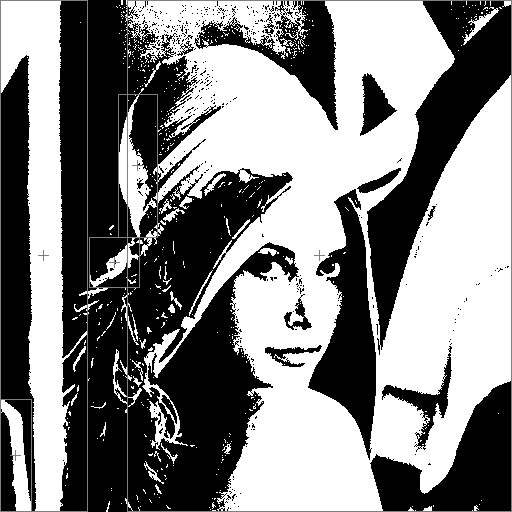

In [55]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

def binary_image(coulmn,row,pix,lena):
    for i in range(coulmn):
        for j in range(row):
            if pix[i,j] < 128:
                lena.putpixel((i,j),0)
            else:
                lena.putpixel((i,j),255)
    lena.save('binary.bmp')
    return lena

def histogram(pix):
    hist=np.zeros(256)
    for i in range(coulmn):
        for j in range(row):
            hist[pix[i,j]]+=1
    plt.fill(hist,color='black')
    plt.savefig('histogram.jpg')
    plt.show()
def connected_components(coulmn,row,pix,lena):
    binary = binary_image(coulmn,row,pix,lena)
    array=np.array(binary,dtype=np.uint64)
    #draw=ImageDraw.Draw(lena)
    #draw.rectangle((100, 100,256,256),outline=128)
    #return binary
    n=0
    for i in range(coulmn):  #Label 
        for j in range(row):
            if array[i,j] != 0:
                n += 1
                array[i,j] = n
                #if i-1 >= 0:
                #    if array[i-1,j] !=0 and array[i-1,j] <= array[i,j]:
                #        array[i,j] = array[i-1,j]
                #if j-1>= 0:
                #    if array[i,j-1] !=0 an3
    flag=0
    while(1):
        flag=1
        for i in range(coulmn): #Top-Down
            for j in range(row):
                if array[i,j] !=0:
                    if i-1 >= 0:
                        if array[i-1,j] !=0 and array[i-1,j] < array[i,j]:
                            array[i,j] = array[i-1,j]
                            flag=0
                    if j-1 >= 0:
                        if array[i,j-1] !=0 and array[i,j-1] < array[i,j]:
                            array[i,j] = array[i,j-1]
                            flag=0
                    if i+1 <= 511:
                        if array[i+1,j] !=0 and array[i+1,j] < array[i,j]:
                            array[i,j] = array[i+1,j]
                            flag=0
                    if j+1 <= 511:
                        if array[i,j+1] !=0 and array[i,j+1] < array[i,j]:
                            array[i,j] = array[i,j+1]
                            flag=0
        for i in range(coulmn-1,-1,-1):#bottom up
            for j in range(row-1,-1,-1):
                if array[i,j] !=0:
                    if i-1 >= 0:
                        if array[i-1,j] !=0 and array[i-1,j] < array[i,j]:
                            array[i,j] = array[i-1,j]
                            flag=0
                    if j-1 >= 0:
                        if array[i,j-1] !=0 and array[i,j-1] < array[i,j]:
                            array[i,j] = array[i,j-1]
                            flag=0
                    if i+1 <= 511:
                        if array[i+1,j] !=0 and array[i+1,j] < array[i,j]:
                            array[i,j] = array[i+1,j]
                            flag=0
                    if j+1 <= 511:
                        if array[i,j+1] !=0 and array[i,j+1] < array[i,j]:
                            array[i,j] = array[i,j+1]
                            flag=0
        if flag==1:
            break
    label_pixelcnt={}
    label_list=[]
    for i in range(coulmn):
        for j in range(row):
            if array[i,j] not in label_pixelcnt:
                label_pixelcnt[array[i,j]] = 1
            else:
                label_pixelcnt[array[i,j]] += 1
    for label in label_pixelcnt :
        if label_pixelcnt[label] > 500:
            label_list.append(label)
    # find >500 area and record upleft and downright points
    area_list = []
    for k in label_list:
        left_bound = 512
        up_bound = 512
        right_bound = -1
        down_bound = -1
        if label_pixelcnt[k] > 500:
            for i in range(coulmn):
                for j in range(row):
                    if array[i,j] == k:
                        left_bound = min(left_bound,i)
                        up_bound = min(up_bound,j)
                        right_bound = max(right_bound,i)
                        down_bound = max(down_bound,j)
                        
            # print (left_bound, up_bound, right_bound, down_bound)
            area_list.append( (up_bound,left_bound,down_bound,right_bound) )
    draw=ImageDraw.Draw(lena)
    for i in area_list:
        if i != (0, 0, 511, 511):
            draw.rectangle(i,outline=128)
            centroid=((i[0]+i[2])/2,(i[1]+i[3])/2)
            draw.line((centroid[0]-5,centroid[1],centroid[0]+5,centroid[1]),fill=128)
            draw.line((centroid[0],centroid[1]-5,centroid[0],centroid[1]+5),fill=128)
    lena.save('connected_components.bmp')
    return lena
    
lena= Image.open("lena.bmp")
pix=lena.load()
coulmn,row=lena.size
binary_image(coulmn,row,pix,lena)
histogram(pix)
connected_components(coulmn,row,pix,lena)